In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import find_peaks

# <font color="red">Replace the word "template" with your name in the filename and remove this label.</font>
<font color="red">This lab is more challenging to analyze than others. I have left explanations in the markdown to assist you. In your submitted report, you should erase my markdown text and replace it with descriptions of your own that show your understanding.</font>
# Franck-Hertz Experiment
by Student

## Introduction
### Historical
How did this experiment demonstrate a quantum phenomenon?

## Experimental
* Describe how the apparatus works and what you do to control it.
    * A diagram is crucial.
    * There are a lot of electrical connections.
        * What does each one do?
    * There are a lot of knobs.
        * What does each one do? For example, why is there an accelerating AND decelerating voltage?
        
## Data and Analysis
We will be loading files from the oscilloscope using Pandas. These files are csv, but you need to prepare them for being read into Jupyter. The file should be two columns as shown below, where x1, x2, ... are the accelerating voltages divided by 10. y1, y2, ... are the y voltages corresponding to electron current.

|x_voltage|y_voltage|
|---------|---------|
|    x1   |   y1    |
|    x2   |   y2    |
|    x1   |   y3    |
|    x4   |   y4    |
|   ...   |   ...   |
|    xN   |   yN    |

Below, I show you how to read your csv file and print to see that it was read properly.

In [11]:
#Read the data file and print the beginning to verify
xy_data = pd.read_csv('./FHData.csv')
xy_data.head()# <font color="red">Replace the word "template" with your name in the filename and remove this label.</font>

,x_voltage,y_voltage
0,0.395781,0.28
1,0.398535,0.28
2,0.401304,0.32
3,0.404088,0.40
4,0.406886,0.40


The apparatus divides the voltage by 10 on the x-axis so that the oscilloscope can read it. We need to create a column of data with the proper x-axis values.

In [13]:
#Create a new column for the voltage x 10
xy_data['x10_voltage'] = xy_data['x_voltage'] * 10
xy_data.head()

,x_voltage,y_voltage,x10_voltage
0,0.395781,0.28,3.95781
1,0.398535,0.28,3.98535
2,0.401304,0.32,4.01304
3,0.404088,0.40,4.04088
4,0.406886,0.40,4.06886


Below is what the graph of the data looks like. You should explain it in your report. You can zoom in on the relevant portion if you wish.

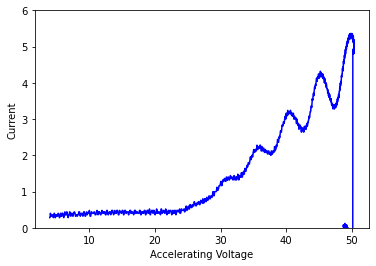

In [101]:
plt.plot(xy_data['x10_voltage'], xy_data['y_voltage'], '-b')
plt.xlabel('Accelerating Voltage')
plt.ylabel('Current')
#plt.xlim(25,50.2)#zoom in on the x-axis 
plt.ylim(0,6)#zoom in on the y-axis
plt.show()

We can use a peak finder `scipy.signal.find_peaks`. An electron collision with mercury gas creates the excitation of a mercury atom, and the electron current drops because the electrons lose their velocity toward the anode. Since we want maxima, we will input `height` and `distance` parameters until the peaks are properly labeled on the graph as seen below. My data is for mercury, and it will be different from neon data you collect. You should understand and explain what these parameters do to help you find the maxima.

8


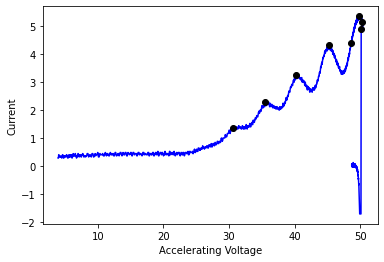

In [89]:
maxlocs, _ = find_peaks(xy_data['y_voltage'], height=1.1, distance=175) #find maxima when the data is flipped
#Create x and y lists for the peaks found
peaks = np.array(xy_data['y_voltage'].iloc[maxlocs])
peaksx = np.array(xy_data['x10_voltage'].iloc[maxlocs])
print(len(peaksx))

#Graph the data with the peaks that were found
plt.plot(xy_data['x10_voltage'], xy_data['y_voltage'], '-b')
plt.plot(peaksx, peaks, 'ok')
plt.xlabel('Accelerating Voltage')
plt.ylabel('Current')
#plt.xlim(45,50.5)
#plt.ylim(0.5,6)
plt.show()

There are some extra peaks. In my case, there is 1 on the left and 2 on the right of the last peak. We want to ignore them. Since the list of peaks is 8 long, I will calculate the differences ($\Delta V$) between maxima only for the first to sixth. I will need to add the last two $\Delta V$ values because I have a hard time excluding the marker to the left of the last real peak. Python counts from zero. So, this range is 0 to 5. The `range` function in Python is what we call exclusive, meaning it includes the first number given and excludes the second number (range goes up to the second number minus 1). Examples of inclusive and exclusive ranges.

```python
range(1,11)
1 through 10 (inclusive)
1 2 3 4 5 6 7 8 9 10

range(1, 10)
1 through 10 (exclusive)
1 2 3 4 5 6 7 8 9
```

In [91]:
for ii in range(0, 5): #go through the list by index
    if ii < len(peaksx)-1: #only go up to the second to last one because of the way we are subtracting
        print(peaksx[ii+1]-peaksx[ii]) #print the difference between the next peak voltage and the current peak voltage

4.940599999999996
4.680800000000005
4.9683999999999955
3.3806999999999974
1.1711000000000098


This gives me $\Delta V$ values of 4.94, 4.68, 4.97, and 4.55 V. For mercury, the electronic transition is expected to be 4.9 V. You are measuring neon and will expect a different value. Now, I will make a list of these voltages so I can calculate statistics (mean and standard error) on them.

In [114]:
results = np.array([4.94, 4.68, 4.97, 4.55])
mean = np.mean(results)
sdm = np.std(results)/np.sqrt(4)
#print(np.around(mean, decimals=1), '+/-', np.around(sdm, decimals=1))
from IPython.display import Markdown as md
md("The mean $\Delta V$ is %.1f $\pm$ %.1f Volts"%(mean,sdm))

The mean $\Delta V$ is 4.8 $\pm$ 0.1 Volts

## Conclusions